<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/12_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#! rm Colegio_Invisible -r

In [2]:
! pip install Pillow
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git


Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 1018, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1018 (delta 15), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (1018/1018), 67.52 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (696/696), done.


for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [3]:
from PIL import Image
import numpy as np

In [4]:
64*8

512

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [5]:
""

''

In [6]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  hg_cry.jpeg	 rum_3.jpeg
asymmetric.png		       hg_drop.jpeg	 rum_4.jpeg
bab_crop.jpeg		       hg_hide.jpeg	 rum_5.jpeg
barb_1.jpeg		       hg_house.jpeg	 rum_6.jpeg
barb_2.jpeg		       hg_invite.jpeg	 rum_7.jpeg
barb_3.jpeg		       hg_rough.png	 rump_final.jpeg
barb_4.jpeg		       hg_xmas.jpeg	 signature.png
barb_5.jpeg		       prv_pub_addr.png  stego.png
barb_6.jpeg		       PubKeyToAddr.png  symmetric.png
barb_7.jpeg		       rum_0.jpeg	 zomnd.png
clavis.jpeg		       rum_1.jpeg
colegio_invisible.jpeg	       rum_2.jpeg


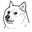

In [115]:
stego_image=Image.open('Colegio_Invisible/img/zomnd.png')
stego_image=stego_image.resize((32,32))
stego_image

In [116]:
type(stego_image)

PIL.Image.Image

In [117]:
stego_array = np.array(stego_image)
stego_array

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [118]:
stego_array.dtype

dtype('uint8')

In [119]:
stego_array.shape

(32, 32, 4)

In [120]:
stego_array[:,:,:3]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [121]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((32, 32), dtype('uint8'))

In [122]:
stego_array_grey

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

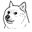

In [123]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [124]:
print(150%64)
print(150-22)

22
128


In [125]:
stego_array_grey_2b=stego_array_grey-(stego_array_grey%64)+63
stego_array_grey_2b

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

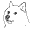

In [126]:
stego_image_grey_2b = Image.fromarray(stego_array_grey_2b)
stego_image_grey_2b

In [127]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [128]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [129]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [130]:
int_2_bit_array(128)

array([1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [131]:
int_2_bit_array(192)

array([1, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [132]:
int_2_bit_array(153)

array([1, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [133]:
import numpy as np
np.packbits(np.array([True]))

array([128], dtype=uint8)

In [134]:
def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

In [135]:
message_2_bit_array(b'sdjnvsdjnskjnv',mode=None)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=uint8)

Now we need a to function that 
- takes an image and turns to a bit array
- takes *uint8* value and turns to bit array

In [136]:
def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

In [137]:
A=int2bitarray(90)
A

array([0, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [138]:
A7=int2bitarray(90,bit=7)
A7

array([0, 1, 0, 1, 1, 0, 1], dtype=uint8)

In [139]:
A2=int2bitarray(90,bit=2)
A2

array([0, 1], dtype=uint8)

In [140]:
(2**np.arange(7,-1,-1))

array([128,  64,  32,  16,   8,   4,   2,   1])

In [141]:
def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

In [142]:
B=int2bitarray(255,bit=2)
B

array([1, 1], dtype=uint8)

In [143]:
bitarray2int(A)

90

In [144]:
bitarray2int(B)

192

In [145]:
def bitarray2int_scale(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return int((b_arr*scales).sum()*255/bitarray2int(np.ones(ln,dtype='uint8')))

In [146]:
bitarray2int_scale(B)

255

In [147]:
bitarray2int_scale(np.array([1,1]))

255

In [148]:
def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

In [149]:
imgarr2bitarray(stego_array_grey,2)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

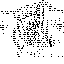

In [151]:
Image.fromarray(imgarr2bitarray(stego_array_grey,4).reshape(64,64)*255)

In [43]:
64*32/8

256.0

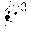

In [152]:
Image.fromarray(imgarr2bitarray(stego_array_grey,1).reshape(32,32)*255)

In [153]:
Image.fromarray(imgarr2bitarray(stego_array_grey,2).reshape(16,128)*255)

In [154]:
g2=imgarr2bitarray(stego_array_grey,2)
g3=imgarr2bitarray(stego_array_grey,3)
g4=imgarr2bitarray(stego_array_grey,4)

G8=[imgarr2bitarray(stego_array_grey,i+1) for i in range(8)]

In [155]:
def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [156]:
trans=bitarray2imgarr(g3,imgshape=(32,32),bit=3,color=1)
trans.shape

(32, 32, 1)

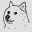

In [157]:
Image.fromarray(trans.reshape(32,32))

In [158]:
trans_scale=bitarray2imgarr(g4,imgshape=(32,32),bit=4,color=1)
trans_scale.shape

(32, 32, 1)

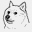

In [159]:
Image.fromarray(trans_scale.reshape(32,32))

In [160]:
len(bit_array_2_byte_str(g4))

512

In [162]:
T8=[bitarray2imgarr(g,imgshape=(32,32),bit=i+1,color=1) for i,g in enumerate(G8)]

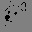

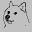

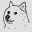

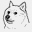

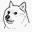

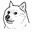

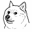

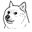

[None, None, None, None, None, None, None, None]

In [163]:
[display(Image.fromarray(t.reshape(32,32))) for t in T8]

In [165]:
64*4*4/80

12.8

In [166]:
#bytes
[ len(g)/8 for g in G8]

[128.0, 256.0, 384.0, 512.0, 640.0, 768.0, 896.0, 1024.0]

In [172]:
#txn
[ len(g)/8/80 for g in G8]

[1.6, 3.2, 4.8, 6.4, 8.0, 9.6, 11.2, 12.8]

In [173]:
#doge
[ len(g)/8/80*2 for g in G8]

[3.2, 6.4, 9.6, 12.8, 16.0, 19.2, 22.4, 25.6]